In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [6]:
FILE_NAME = 'analog_pwm_data.txt'

In [9]:
analog_data = pd.read_csv(FILE_NAME)

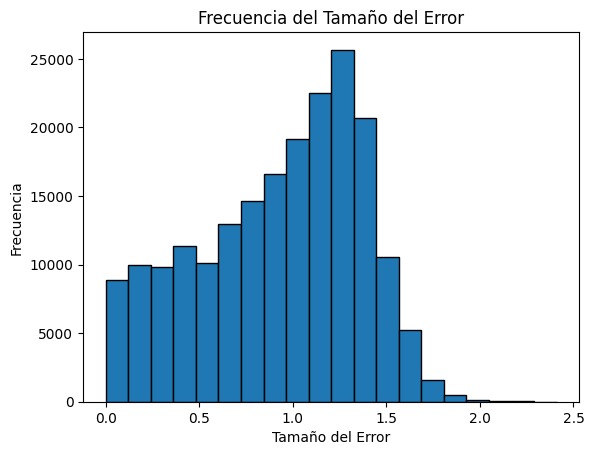

In [20]:
analog_data['error'] = abs(analog_data['read_val'] - analog_data['ratio'])

# This relative error has the problem that the ratio can be 0.0 and creates an relative_error = inf
analog_data['relative_error'] = (analog_data['error'] / analog_data['ratio']) * 100
finite_vals = analog_data[np.isfinite(analog_data['relative_error'])]


analog_data['percentual_error'] = analog_data['error'] * 100 # Maybe 'percentual_error' is not the correct name


# Crear un histograma del tamaño del error
plt.hist(analog_data['percentual_error'], bins=20, edgecolor='black')
plt.title('Frecuencia del Tamaño del Error')
plt.xlabel('Tamaño del Error')
plt.ylabel('Frecuencia')
plt.show()


In [ ]:
analog_data

In [5]:
new_data = analog_data.groupby('ratio')['relative_error'].mean()
plt.plot(new_data['ratio'], new_data['relative_error'])

In [ ]:
analog_data_a = analog_data[analog_data['frequency_out'] == 10000]
analog_data_b = analog_data[analog_data['frequency_out'] == 15000]

plt.plot(analog_data_a['ratio'], analog_data_a['relative_error'])
plt.plot(analog_data_b['ratio'], analog_data_b['relative_error'])

In [ ]:
iterations_a = analog_data_a.groupby(['iteration', 'ratio'])['relative_error'].mean()
iterations_b = analog_data_b.groupby(['iteration', 'ratio'])['relative_error'].mean()